# Introduction to KNN

KNN stands for K-Nearest Neigbours. KNN is a machine learning algorithm used for classifying data. Rather than comping up with a numerical prediction such as student grade or stock price it attempts to classify data into certain categories. In this project we will be using the algorithm to classify cars in 4 categories based upon certain features.

# Importing Modules
* import modules requred for  the model

In [1]:
# this will be used to normalize our data and convert non-numeric values into numeric values
from sklearn import preprocessing

In [2]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

# Loading Data
After placing our car.data file into our current script directory we can load our data. To load our data we will use pandas module.

In [3]:
data = pd.read_csv("car.data")
print(data.head()) #to check if our data is loaded correctly

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


# Convering Data
* Here our data is not numeric
* In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number
* Sklearn has method that can do this fo us
* We will create a label encoder object
* Then use that to encode each column of our data into integers

In [4]:
le = preprocessing.LabelEncoder()

In [5]:
# The method fit_transform() takes a list (each of our columns) and return to us an array containing new values
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data['maint']))
door = le.fit_transform(list(data['door']))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
cls = le.fit_transform(list(data['class']))

In [9]:
# Now recomnbine our data into a feature list and label list. zip function makes it easier
X = list(zip(buying,maint,door,persons,lug_boot,safety)) #features
y=list(cls) #labels

In [10]:
#now split our data into training and testing data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

# How Does K-Nearest Neigbours Work?
In, short K-Nearest Neighbours works by looking at the K closest points to the given data point (the one we want to classify) and picking the class that occurs the most to be the predicted value. This is why this algorithm typically works best when we can identify clusters of points in our data set.

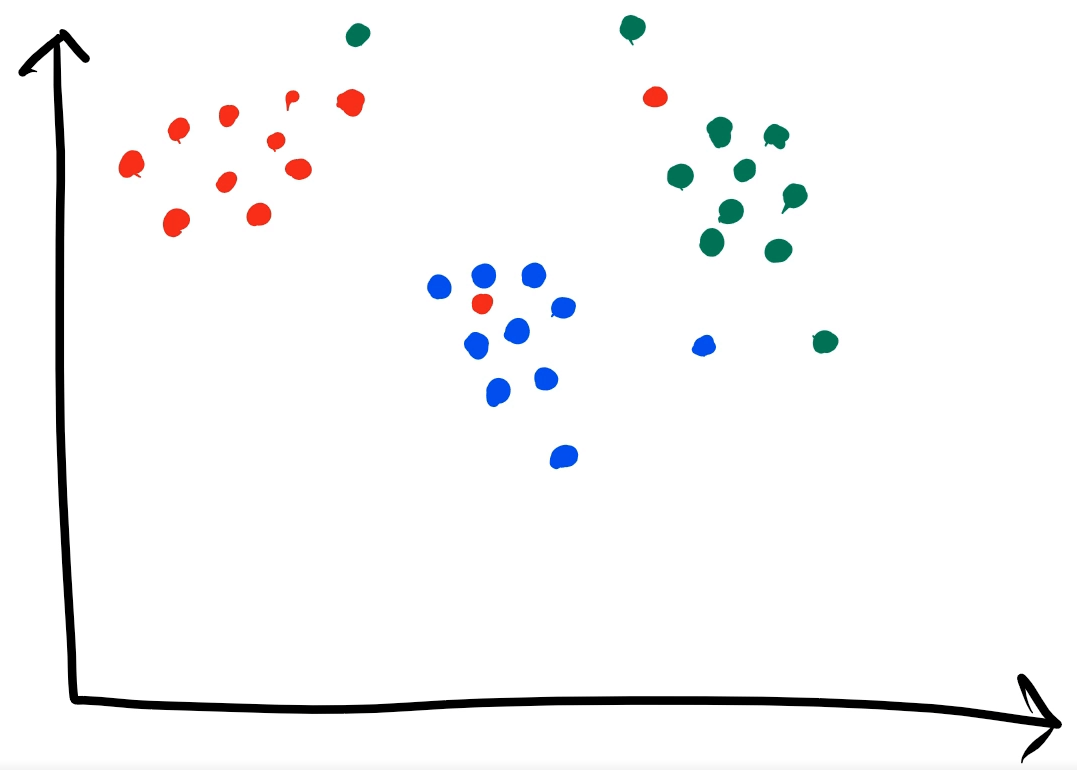 

We can clearly see that there are groups of the same class points clustered together. Because of this correlation we can use the correlation we can use the K-Nearest Neighbours algorithm to make accurate classifications.

# Example
Let's have a look at the following example:
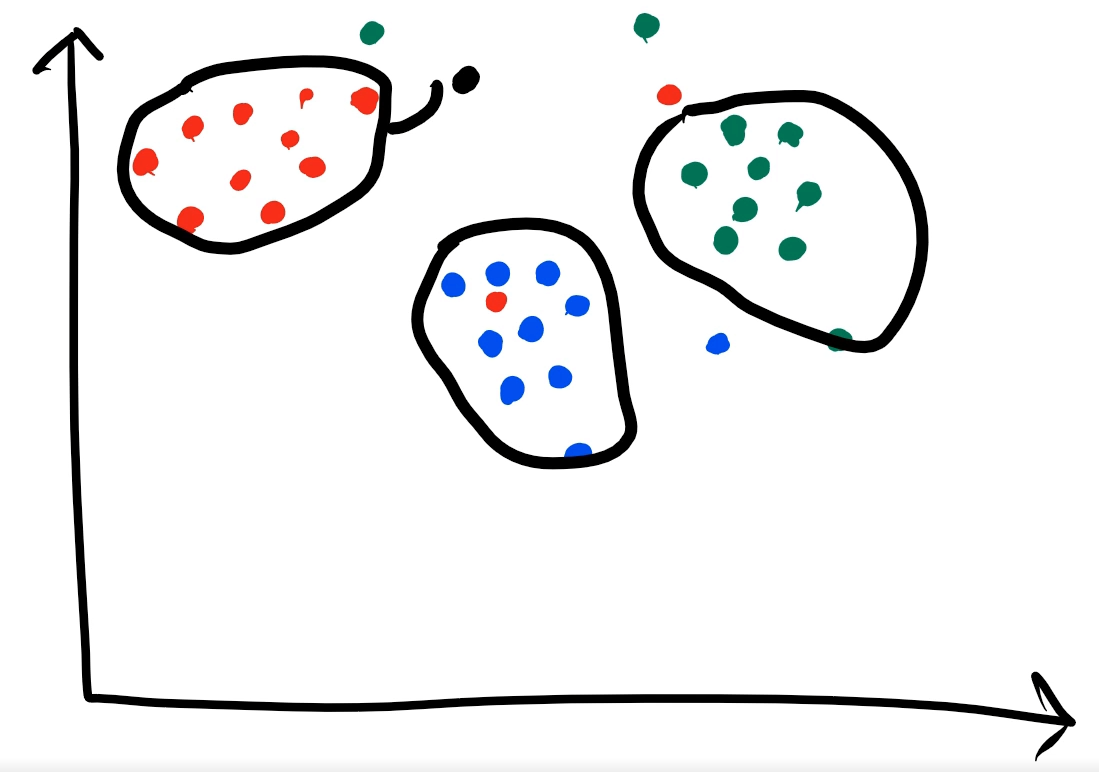

We want to classify the black dot as either red, blue or green. Simply looking at the data we can see that it clearly belongs to the red class, but how do we design an algorithm to do this?

First, we need to define a K value. This is going to be how many points we should use to make our decision. The K closest points to the black dot.

Next, we need to find out the class of these K points.

Finally, we determine which class appears the most out of all of our K points and that is our prediction.
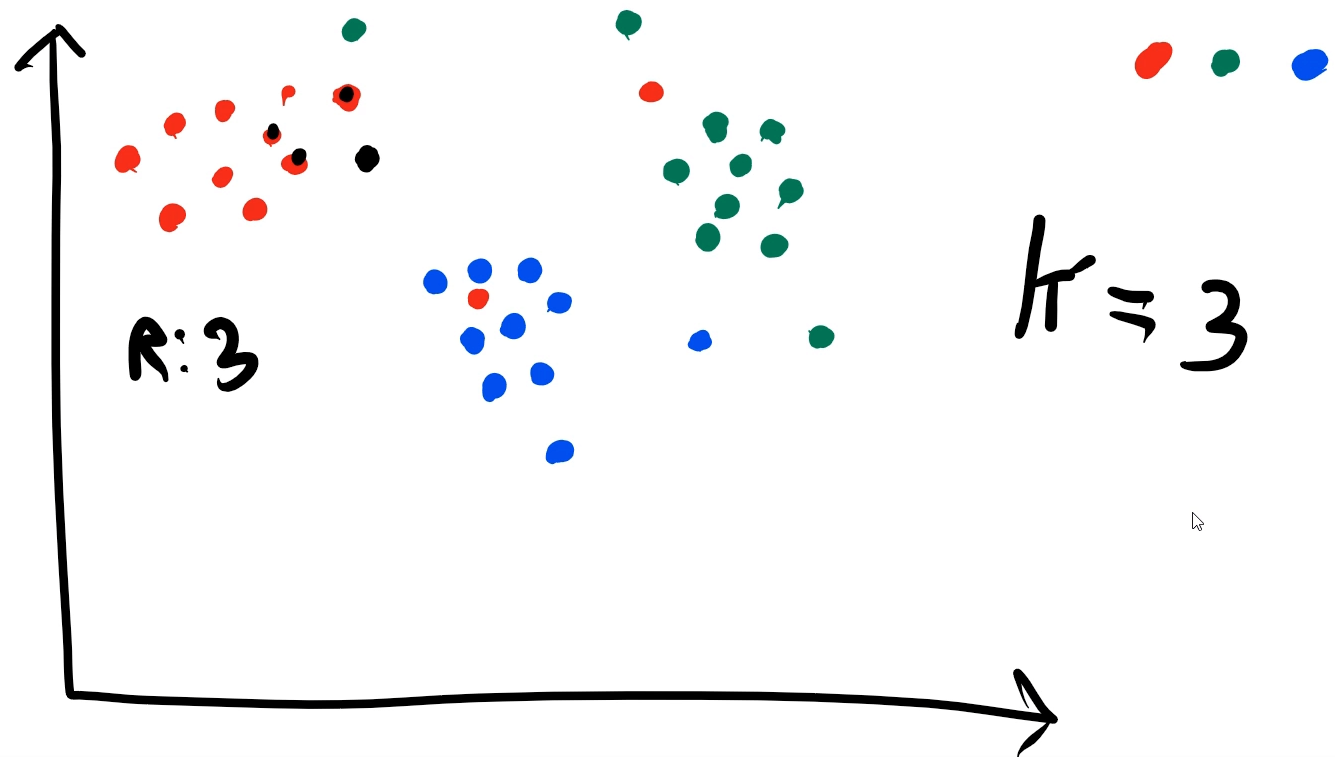

In this example our K value is 3.

THe 3 closest points to our black dot are the ones that have small black dots on them.
All three of these points are red, therefore red occurs the most. So we classify the black dot as apart of the red group.

We will use mathematically eucliden distance formula: 
to calculate the distance:


let R(x1,y1) and R2(x2,y2)

d = &#8730;sq(x2-x1) + sq(y2-y1)

# Limitations and Drawbacks
* Although the KNN algorithms is very good at performing simple classification task it has many limitations.
* One of which is its Training/Prediction Time. Since the algorithms finds the distance between the data point and every point in the training set it is very computationally heavy.
* Unlike algorithms like linear regression which simply apply a function to given data point the KNN algorithm requires the entire data set to make a prediction.
* This means every time we make a prediction we must wait for the algorithm to compare our given data to each point.
* In data sets that contain millions of elements this is a HUGE drawback.
* Another drawback of the algorithm is its memory usage. Due to the way it works (outlined above) requires that the entire data set be loaded into memory to perform a prediction.
* It is possible to batch load our data memory but that is extremely time consuming

# Summary
* The KNN algorithms is very good at classifcation on small data sets that contain few dimensions (features)
* It is very simple to implement and is a good choice for performing quick classification on small data
* However, when moving into extremely large data sets and making a large amount of predictions it is very limited.

# Training a KNN Classifier
Creating a KNN classifier is almost identical to how we created the linear regression model.
The only difference is we can specify how many neighbouts to look for as the argument n_neighbors.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)

In [12]:
# To train our model we follow precisely the same steps as outlined earlier.
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [13]:
# once again to score our model calculate accuracy
acc = model.score(x_test,y_test)
print(acc)

0.9248554913294798


# Testing our Model
To see how our model is performing on the unique elements of our test data

In [14]:
# This will display the predictes class, our data and the actual class
# We create a name list so that we can convert our integer predictions into thier string representation

predicted = model.predict(x_test)
names=["unacc","acc","good","vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])

Predicted:  good Data:  (1, 1, 3, 0, 2, 2) Actual:  good
Predicted:  good Data:  (0, 1, 1, 1, 1, 1) Actual:  good
Predicted:  good Data:  (3, 1, 2, 0, 1, 1) Actual:  good
Predicted:  good Data:  (3, 1, 0, 2, 2, 2) Actual:  good
Predicted:  good Data:  (3, 3, 2, 1, 0, 2) Actual:  good
Predicted:  unacc Data:  (0, 1, 0, 2, 0, 0) Actual:  unacc
Predicted:  good Data:  (2, 3, 2, 2, 2, 2) Actual:  good
Predicted:  good Data:  (1, 1, 3, 0, 0, 2) Actual:  good
Predicted:  good Data:  (3, 3, 2, 0, 2, 1) Actual:  good
Predicted:  good Data:  (2, 0, 0, 0, 2, 1) Actual:  good
Predicted:  good Data:  (0, 1, 1, 1, 1, 2) Actual:  good
Predicted:  good Data:  (3, 2, 3, 2, 1, 1) Actual:  good
Predicted:  good Data:  (2, 0, 0, 1, 0, 2) Actual:  unacc
Predicted:  good Data:  (2, 2, 3, 2, 2, 1) Actual:  good
Predicted:  good Data:  (0, 0, 0, 0, 0, 1) Actual:  good
Predicted:  unacc Data:  (2, 0, 0, 2, 1, 0) Actual:  unacc
Predicted:  good Data:  (1, 3, 3, 1, 2, 2) Actual:  good
Predicted:  good Data:  (2

# Lookingh at Neighbors
* The KNN model has a unique method that allows for us to see the neighbors of a given data point
* We can use the information to plot our data and get a better idea of where our model may lack accyracy
* We can use model.neighbors 
* Note: The .neighbors method takes 2D  as input, if we want to pass one data point we need surround it with [] so that it is in the right shape
* Parameters: The parameters for .neighbors are as follows: data(2D array), #of neigbors(int), distance(True or False)
* Return: This will return to us an array with the index in our data of each neighbor. If distance = True then it will also return the distance to each neighbor from our data point

In [ ]:
for x in range()